<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Model Development


Estimated time needed: **30** minutes
    

## Objectives

After completing this lab you will be able to:

* Develop prediction models


<p>In this section, we will develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.</p>


Dans cette section, nous allons développer plusieurs modèles qui permettront de prédire le prix de la voiture à l’aide des variables ou des caractéristiques. Ce n’est qu’une estimation mais devrait nous donner une idée objective du coût de la voiture.

Some questions we want to ask in this module
<ul>
    <li>Do I know if the dealer is offering fair value for my trade-in?</li>
    <li>Do I know if I put a fair value on my car?</li>
</ul>
<p>In data analytics, we often use <b>Model Development</b> to help us predict future observations from the data we have.</p>

<p>A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.</p>


Quelques questions que nous voulons poser dans ce module

- Est-ce que je sais si le concessionnaire offre la juste valeur de mon échange ?
- Est-ce que je sais si j’ai mis une juste valeur sur ma voiture ?
Dans l’analyse des données, nous utilisons souvent le développement de modèles pour nous aider à prédire les observations futures à partir des données dont nous disposons.

Un modèle nous aidera à comprendre la relation exacte entre les différentes variables et comment ces variables sont utilisées pour prédire le résultat.

<h4>Setup</h4>


 Import libraries:


In [ ]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3-y
#! mamba install numpy=1.21.2-y
#! mamba install sklearn=0.20.1-y

In [2]:
import piplite
await piplite.install('seaborn')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data and store it in dataframe `df`:


This dataset was hosted on IBM Cloud object. Click <a href="https://cocl.us/DA101EN_object_storage">HERE</a> for free storage. Download it by running the cell below.


In [4]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [6]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

await download(file_path, "usedcars.csv")
file_name="usedcars.csv"

In [7]:
df = pd.read_csv(file_name)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


>Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply skip the steps above, and simply use the URL directly in the pandas.read_csv() function. You can uncomment and run the statements in the cell below.


Remarque : Cette version du laboratoire fonctionne sur JupyterLite, ce qui nécessite le téléchargement du jeu de données sur l’interface. En travaillant sur la version téléchargée de ce notebook sur leurs machines locales (Jupyter Anaconda), les apprenants peuvent simplement sauter les étapes ci-dessus et utiliser simplement l’URL directement dans la fonction pandas.read_csv(). Vous pouvez annuler les commentaires et exécuter les instructions dans la cellule ci-dessous.

In [8]:
#filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
#df = pd.read_csv(filepath, header=None)

<h2>1. Linear Regression and Multiple Linear Regression</h2>


<h4>Linear Regression</h4>



<p>One example of a Data  Model that we will be using is:</p>
<b>Simple Linear Regression</b>

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>



Voici un exemple de modèle de données que nous utiliserons :

Régression linéaire simple
La régression linéaire simple est une méthode pour nous aider à comprendre la relation entre deux variables :

- Le prédicteur/variable indépendante (X)
- La variable réponse/dépendante (que nous voulons prédire)(Y)

Le résultat de la régression linéaire est une fonction linéaire qui prédit la variable de réponse (dépendante) en fonction de la variable prédictive (indépendante).

$$
 Y: Response \ Variable\\\\\\
 X: Predictor \ Variables
$$


 <b>Linear Function</b>
$$
Yhat = a + b  X
$$


<ul>
    <li>a refers to the <b>intercept</b> of the regression line, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>


- a fait référence à l’ordonnée à l’origine de la droite de régression, c’est-à-dire : la valeur de Y lorsque X est 0
- b fait référence à la pente de la droite de régression, c’est-à-dire : la valeur avec laquelle Y change lorsque X augmente de 1 unité

<h4>Let's load the modules for linear regression:</h4>


In [9]:
from sklearn.linear_model import LinearRegression

<h4>Create the linear regression object:</h4>


Créez l’objet de régression linéaire :

In [10]:
lm = LinearRegression()
lm

LinearRegression()

<h4>How could "highway-mpg" help us predict car price?</h4>


In [ ]:
Comment le « mpg sur autoroute » pourrait-il nous aider à prédire le prix d’une voiture ?

For this example, we want to look at how highway-mpg can help us predict car price.
Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.


Pour cet exemple, nous voulons voir comment l’autoroute peut nous aider à prédire le prix d’une voiture. En utilisant une régression linéaire simple, nous allons créer une fonction linéaire avec « highway-mpg » comme variable prédictive et « price » comme variable de réponse.

In [11]:
X = df[['highway-mpg']]
Y = df['price']

Fit the linear model using highway-mpg:


In [ ]:
Ajuster le modèle linéaire à l’aide de highway-mpg :

In [12]:
lm.fit(X,Y)

LinearRegression()

 We can output a prediction:


Nous pouvons produire une prédiction :

In [14]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

<h4>What is the value of the intercept (a)?</h4>


Quelle est la valeur de l’ordonnée à l’origine (a) ?

In [15]:
lm.intercept_

38423.30585815743

<h4>What is the value of the slope (b)?</h4>


In [ ]:
Quelle est la valeur de la pente (b) ?

In [16]:
lm.coef_

array([-821.73337832])

<h3>What is the final estimated linear model we get?</h3>


Quel est le modèle linéaire final estimé que nous obtenons ?

As we saw above, we should get a final linear model with the structure:


Comme nous l’avons vu ci-dessus, nous devrions obtenir un modèle linéaire final avec la structure :

$$
Yhat = a + b  X
$$


Plugging in the actual values we get:


En introduisant les valeurs réelles, nous obtenons :

<b>Price</b> = 38423.31 - 821.73 x <b>highway-mpg</b>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 a): </h1>

<b>Create a linear regression object called "lm1".</b>
</div>


In [ ]:
Créez un objet de régression linéaire appelé « lm1 ».

In [17]:
# Write your code below and press Shift+Enter to execute 
lm1=LinearRegression()
lm1

LinearRegression()

<details><summary>Click here for the solution</summary>

```python
lm1 = LinearRegression()
lm1
```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #1 b): </h1>

<b>Train the model using "engine-size" as the independent variable and "price" as the dependent variable?</b>
</div>


In [ ]:
Entraîner le modèle en utilisant « engine-size » comme variable indépendante et « price » comme variable dépendante ?

In [19]:
# Write your code below and press Shift+Enter to execute
# fit model

lm1.fit(df[["engine-size"]], df["price"])

LinearRegression()

<details><summary>Click here for the solution</summary>

```python
lm1.fit(df[['engine-size']], df[['price']])
lm1
```

</details>



<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 c):</h1>

<b>Find the slope and intercept of the model.</b>
</div>


<h4>Slope</h4>


In [21]:
# Write your code below and press Shift+Enter to execute 
lm1.coef_

array([166.86001569])

<h4>Intercept</h4>


In [22]:
# Write your code below and press Shift+Enter to execute 
lm1.intercept_

-7963.338906281049

<details><summary>Click here for the solution</summary>

```python
# Slope 
lm1.coef_

# Intercept
lm1.intercept_
```

</details>



<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 d): </h1>

<b>What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".</b>
</div>


Quelle est l’équation de la droite prédite ? Vous pouvez utiliser x et yhat ou « motor-size » ou « price ».

In [24]:
# Write your code below and press Shift+Enter to execute
price=  -7963.338906281049 + 166.86001569*df["engine-size"]



In [25]:
Yhat=-7963.34 + 166.86*X

<details><summary>Click here for the solution</summary>

```python
# using X and Y  
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*df['engine-size']

```

</details>



<h4>Multiple Linear Regression</h4>


<p>What if we want to predict car price using more than one variable?</p>

<p>If we want to use more variables in our model to predict car price, we can use <b>Multiple Linear Regression</b>.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:</p>


Que se passe-t-il si nous voulons prédire le prix d’une voiture en utilisant plus d’une variable ?

Si nous voulons utiliser plus de variables dans notre modèle pour prédire le prix d’une voiture, nous pouvons utiliser la régression linéaire multiple. La régression linéaire multiple est très similaire à la régression linéaire simple, mais cette méthode est utilisée pour expliquer la relation entre une variable de réponse continue (dépendante) et deux variables prédictives (indépendantes) ou plus.La plupart des modèles de régression du monde réel impliquent plusieurs prédicteurs. Nous illustrerons la structure en utilisant quatre variables prédictives, mais ces résultats peuvent généraliser à n’importe quel entier :

$$
Y: Response \ Variable\\\\\\
X_1 :Predictor\ Variable \ 1\\\\
X_2: Predictor\ Variable \ 2\\\\
X_3: Predictor\ Variable \ 3\\\\
X_4: Predictor\ Variable \ 4\\\\
$$


$$
a: intercept\\\\\\
b_1 :coefficients \ of\ Variable \ 1\\\\
b_2: coefficients \ of\ Variable \ 2\\\\
b_3: coefficients \ of\ Variable \ 3\\\\
b_4: coefficients \ of\ Variable \ 4\\\\
$$


The equation is given by:


$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$


<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Let's develop a model using these variables as the predictor variables.


D’après la section précédente, nous savons que d’autres bons prédicteurs de prix pourraient être :

- Cheval-vapeur
- Poids à vide
- Taille du moteur
- Autoroute mpg

  
Développons un modèle en utilisant ces variables comme variables prédictives.

In [26]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Fit the linear model using the four above-mentioned variables.


In [27]:
lm.fit(Z, df['price'])

LinearRegression()

What is the value of the intercept(a)?


In [28]:
lm.intercept_

-15806.62462632922

What are the values of the coefficients (b1, b2, b3, b4)?


Quelles sont les valeurs des coefficients (b1, b2, b3, b4) ?

In [30]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

 What is the final estimated linear model that we get?


In [ ]:
Quel est le modèle linéaire final estimé que nous obtenons ?

As we saw above, we should get a final linear function with the structure:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

What is the linear function we get in this example?


<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2 a): </h1>
Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and  "highway-mpg".
</div>


Créez et entraînez un modèle de régression linéaire multiple « lm2 » où la variable de réponse est « price » et la variable de prédiction est « normalized-losses » et « highway-mpg ».

In [32]:
# Write your code below and press Shift+Enter to execute
lm2= LinearRegression()


lm2.fit(df[["normalized-losses",'highway-mpg']], df['price'])


LinearRegression()

<details><summary>Click here for the solution</summary>

```python
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])


```

</details>



<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #2 b): </h1>
<b>Find the coefficient of the model.</b>
</div>


In [33]:
# Write your code below and press Shift+Enter to execute 
lm2.coef_

array([   1.49789586, -820.45434016])

<details><summary>Click here for the solution</summary>

```python
lm2.coef_

```

</details>



<h2>2. Model Evaluation Using Visualization</h2>


Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.


Maintenant que nous avons développé quelques modèles, comment évaluons-nous nos modèles et choisissons-nous le meilleur ? Une façon de le faire est d’utiliser une visualisation.

Import the visualization package, seaborn:


In [34]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

<h3>Regression Plot</h3>


<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.</p>

<p>This plot will show a combination of a scattered data points (a <b>scatterplot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>


Lorsqu’il s’agit de régression linéaire simple, un excellent moyen de visualiser l’ajustement de notre modèle est d’utiliser des tracés de régression.

Ce graphique montrera une combinaison de points de données dispersés (un nuage de points), ainsi que la droite de régression linéaire ajustée traversant les données. Cela nous donnera une estimation raisonnable de la relation entre les deux variables, de la force de la corrélation, ainsi que de la direction (corrélation positive ou négative).

 Let's visualize **highway-mpg** as potential predictor variable of price:


Visualisons l’autoroute mpg comme variable de prédiction potentielle du prix :

(0.0, 48196.80573727094)

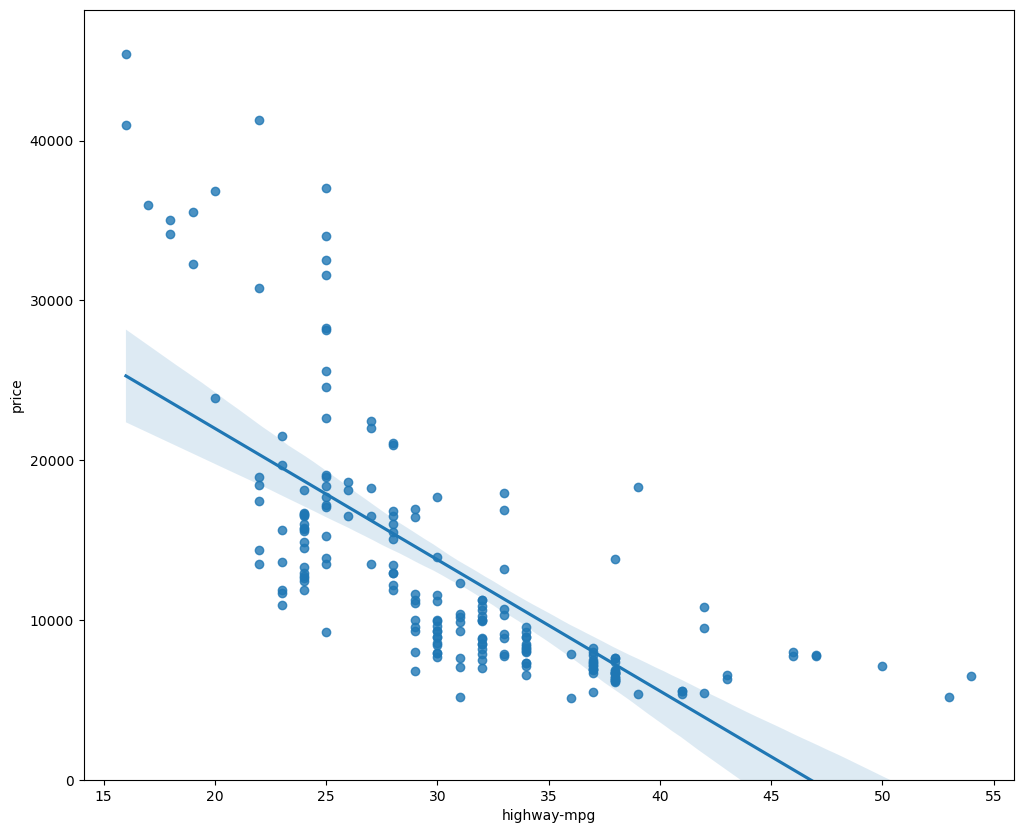

In [35]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

<p>We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

Let's compare this plot to the regression plot of "peak-rpm".</p>


Nous pouvons voir sur ce graphique que le prix est négativement corrélé à l’autoroute puisque la pente de régression est négative.

Une chose à garder à l’esprit lorsque vous examinez un graphique de régression est de prêter attention à la dispersion des points de données autour de la droite de régression. Cela vous donnera une bonne indication de la variance des données et si un modèle linéaire serait le mieux adapté ou non. Si les données sont trop éloignées de la ligne, ce modèle linéaire n’est peut-être pas le meilleur modèle pour ces données.

Comparons ce graphique au graphique de régression de « peak-rpm ».

(0.0, 47414.1)

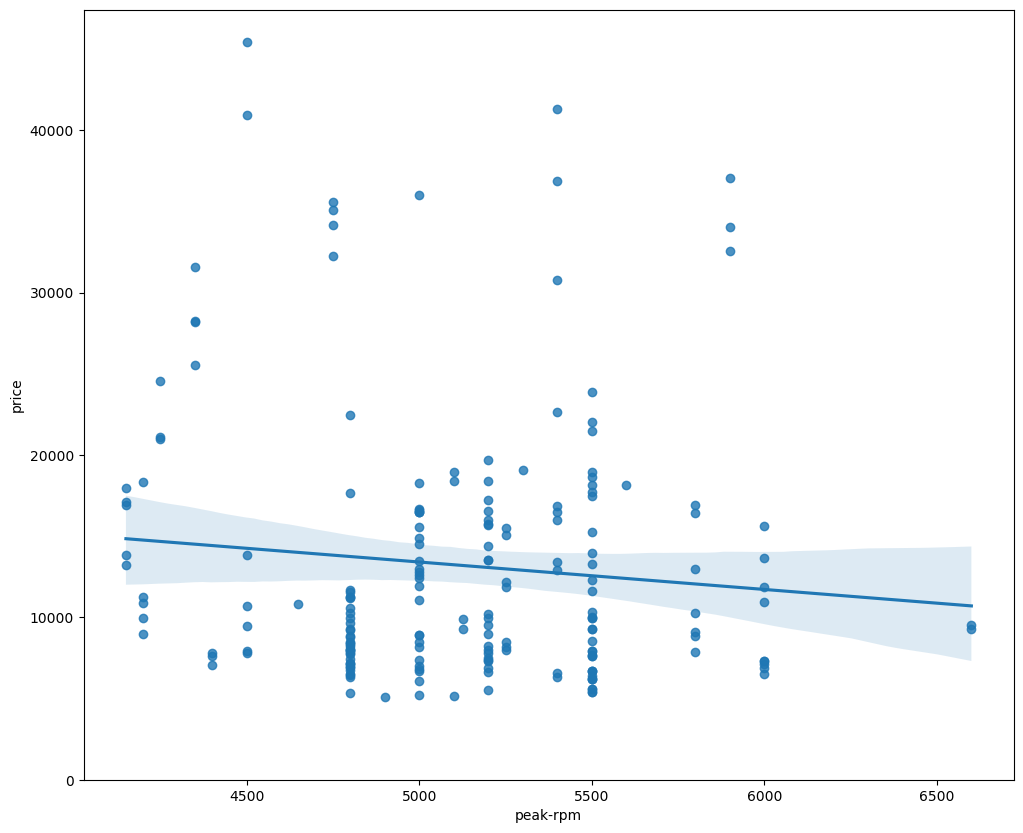

In [36]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<p>Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.</p>


En comparant le tracé de régression de « peak-rpm » et de « highway-mpg », nous voyons que les points de « highway-mpg » sont beaucoup plus proches de la ligne générée et, en moyenne, diminuent. Les points pour le « régime de pointe » sont plus répartis autour de la ligne prévue et il est beaucoup plus difficile de déterminer si les points diminuent ou augmentent à mesure que le « régime de pointe » augmente.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #3:</h1>
<b>Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method  ".corr()" to verify your answer.</b>
</div>


Compte tenu des graphiques de régression ci-dessus, le « pic-rpm » ou le « highway-mpg » sont-ils plus fortement corrélés au « prix » ? Utilisez la méthode « .corr() » pour vérifier votre réponse.

In [37]:
# Write your code below and press Shift+Enter to execute
df[["peak-rpm", "highway-mpg","price"]].corr()


,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


# La variable « highway-mpg » a une corrélation plus forte avec « price », elle est d’environ -0,704692 par rapport à « peak-rpm » qui est d’environ -0,101616. Vous pouvez le vérifier à l’aide de la commande suivante :

<details><summary>Click here for the solution</summary>

```python
# The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616. You can verify it using the following command:

df[["peak-rpm","highway-mpg","price"]].corr()

```

</details>



<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>


<h3>Parcelle résiduelle</h3>

<p>Une bonne façon de visualiser la variance des données est d’utiliser un graphique résiduel.</p>

<p>Qu’est-ce qu’un <b>résidu</b> ?</p>

<p>La différence entre la valeur observée (y) et la valeur prédite (Yhat) est appelée la valeur résiduelle (e). Lorsque nous regardons un graphique de régression, le résidu est la distance entre le point de données et la droite de régression ajustée.</p>

<p>Alors, qu’est-ce qu’une <b>parcelle résiduelle</b> ?</p>

<p>Un graphique résiduel est un graphique qui montre les résidus sur l’axe vertical des y et la variable indépendante sur l’axe horizontal des x.</p>

<p>À quoi faisons-nous attention lorsque nous regardons une parcelle résiduelle ?</p>

<p>Nous examinons la répartition des résidus :</p>

<p>- Si les points d’un graphique résiduel sont <b>répartis de manière aléatoire autour de l’axe des abscisses</b>, un <b>modèle linéaire est approprié</b> pour les données.

    
Pourquoi? Des résidus répartis de manière aléatoire signifient que la variance est constante et que le modèle linéaire convient bien à ces données.</p>

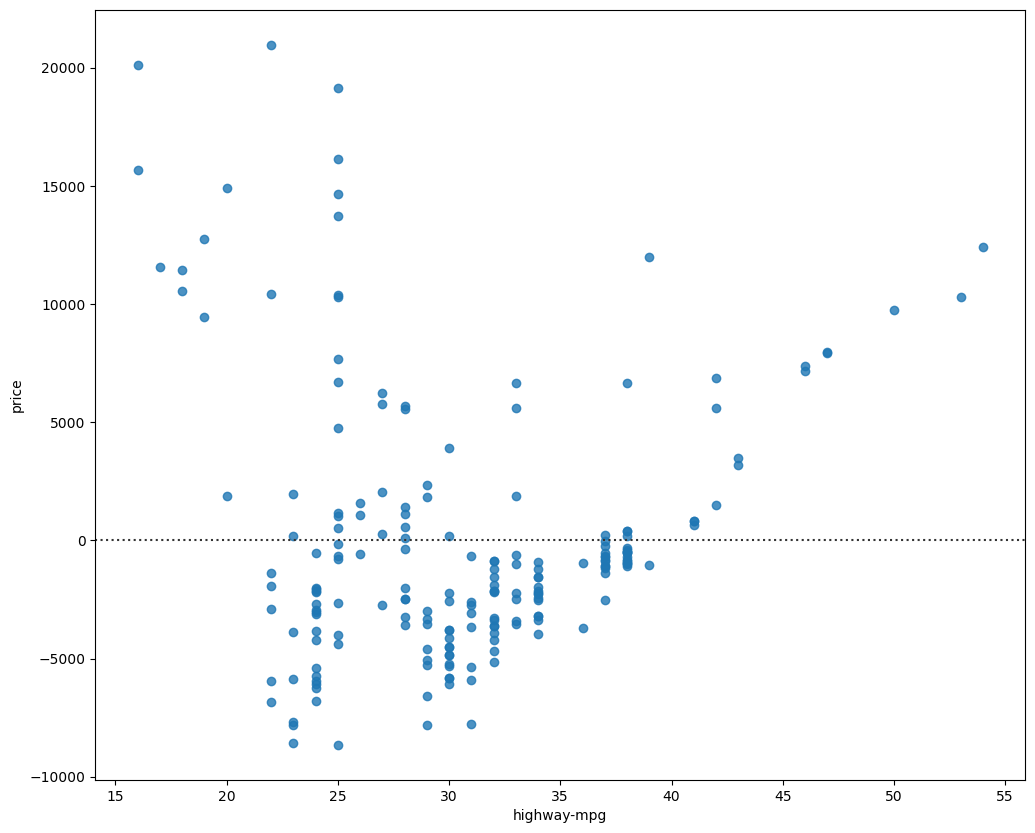

In [38]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

<i>What is this plot telling us?</i>

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.</p>


Que nous dit cette intrigue ?

Nous pouvons voir sur ce graphique résiduel que les résidus ne sont pas répartis de manière aléatoire autour de l’axe des x, ce qui nous amène à penser qu’un modèle non linéaire est peut-être plus approprié pour ces données.

<h3>Multiple Linear Regression</h3>


<p>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the <b>distribution plot</b>. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>


Comment visualiser un modèle de régression linéaire multiple ? Cela devient un peu plus compliqué car vous ne pouvez pas le visualiser avec une régression ou un graphique résiduel.

Une façon d’examiner l’ajustement du modèle est de regarder le graphique de distribution. Nous pouvons examiner la distribution des valeurs ajustées qui résultent du modèle et la comparer à la distribution des valeurs réelles.

First, let's make a prediction:


In [ ]:
Tout d’abord, faisons une prédiction :

In [39]:
Y_hat = lm.predict(Z)

<ipython-input-40-7377bca648c1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
<ipython-input-40-7377bca648c1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" 

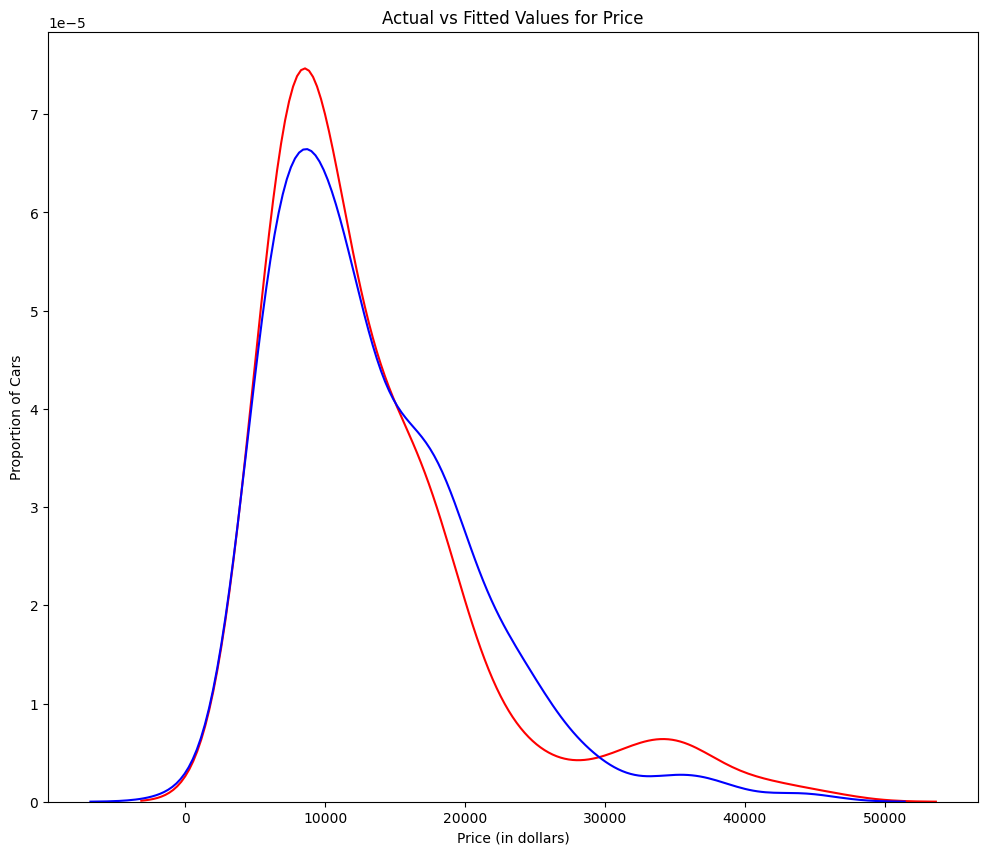

In [40]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>


Nous pouvons voir que les valeurs ajustées sont raisonnablement proches des valeurs réelles puisque les deux distributions se chevauchent un peu. Cependant, il y a certainement place à l’amélioration.

<h2>3. Polynomial Regression and Pipelines</h2>


3. Régression polynomiale et pipelines

<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>


La régression polynomiale est un cas particulier du modèle de régression linéaire générale ou des modèles de régression linéaire multiple.

Nous obtenons des relations non linéaires en mettant au carré ou en définissant des termes d’ordre supérieur des variables prédictives.

Il existe différents ordres de régression polynomiale :

<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$


<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\
$$


<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$


<center><b>Quadratique - 2ème Ordre</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<center><b>Cubique - 3ème Ordre</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3
$$

<center><b>Ordre supérieur</b> :</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....
$$


<p>We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.</p>


Nous avons vu précédemment qu’un modèle linéaire ne fournissait pas le meilleur ajustement en utilisant « highway-mpg » comme variable prédictive. Voyons si nous pouvons essayer d’ajuster un modèle polynomial aux données à la place.

<p>We will use the following function to plot the data:</p>


In [42]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Bonjour @ MAHI NDOUNG rodrigue,

Merci pour votre message. Nous sommes heureux de pouvoir vous aider.

Décomposons le code PlotPolly étape par étape :  Explication de la fonction :

1 Définition de la fonction :


PlotPolly (model, independent_variable, dependent_variabble, Name) : Cette fonction prend

 quatre paramètres : 
 

2 Générer de nouveaux points de données : 
x_new = np.linspace (15, 55, 100) : génère 100 points régulièrement espacés entre 15 et 55. Ces points sont utilisés pour générer les valeurs prédites (y_new) à partir du modèle polynomial

. 
3 y_new = model (x_new) : calcule les valeurs prédites (y_new) à l'aide du modèle polynomial fourni (model) et des valeurs x_new.

 
4 Tracé :

 
plt.plot (independent_variable, dependent_variabble, ' . ', x_new, y_new,' - ') :

 
5 Personnalisation du tracé :

 
plt.title (« Ajustement polynomial avec Matplotlib pour

 le prix ~ la longueur ») : définit le titre du graphique. 
ax = plt.gca () : Obtient l'instance Axes actuelle.

 
ax.set_facecolor ((0.898, 0.898, 0.898)) : définit la couleur d'arrière-plan du graphique en gris clair.

 
fig = plt.gcf () : Obtient l'instance de figure actuelle.

 
plt.xlabel (Name) : définit l'étiquette pour l'axe X à l'aide du paramètre Name.

 
6 plt.ylabel ('Price of Cars') : définit l'étiquette pour l'axe Y.

 
7 Afficher et fermer le graphique :

 
plt.show () : affiche le

 graphique. 
Objectif de la fonction :

La fonction PlotPolly est conçue pour visualiser l'ajustement d'un modèle polynomial aux points de données (independent_variable, dependent_variabble). Il trace à la fois les points de données d'origine et la courbe polynomiale générée par le modèle à l'aide de Matplotlib. L'intrigue comprend un titre, des étiquettes d'axes et un fond gris clair à des fins esthétiques.

Bon apprentissage !

Cordialement

In [ ]:
Function Definition:

PlotPolly(model, independent_variable, dependent_variabble, Name): This function takes four parameters:

Generate New Data Points:

x_new = np.linspace(15, 55, 100): Generates 100 evenly spaced points between 15 and 55. These points are used to generate the predicted values (y_new) from the polynomial model.

y_new = model(x_new): Computes the predicted values (y_new) using the provided polynomial model (model) and the x_new values.

Plotting:

plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-'):

Plot Customization:

plt.title('Polynomial Fit with Matplotlib for Price ~ Length'): Sets the title of the plot.

ax = plt.gca(): Gets the current Axes instance.

ax.set_facecolor((0.898, 0.898, 0.898)): Sets the background color of the plot to a light gray.

fig = plt.gcf(): Gets the current figure instance.

plt.xlabel(Name): Sets the label for the x-axis using the Name parameter.

plt.ylabel('Price of Cars'): Sets the label for the y-axis.

Display and Close Plot:

plt.show(): Displays the plot.

plt.close(): Closes the plot to free up memory (optional, as plt.show() usually takes care of this).

Function Purpose:

The function PlotPolly is designed to visualize a polynomial model's fit to data points (independent_variable, dependent_variabble). It plots both the original data points and the polynomial curve generated by the model using Matplotlib. The plot includes a title, axis labels, and a light gray background for aesthetic purposes.

Happy Learning!

With Regards 

Let's get the variables:


In [43]:
x = df['highway-mpg']
y = df['price']

Let's fit the polynomial using the function <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.


Ajustons le polynôme à l’aide de la fonction polyfit, puis utilisons la fonction poly1d pour afficher la fonction polynomiale.

In [45]:
# Here we use a polynomial of the 3rd order (cubic) 
# Ici, nous utilisons un polynôme d’ordre 3 (cubique)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


 Let's plot the function:


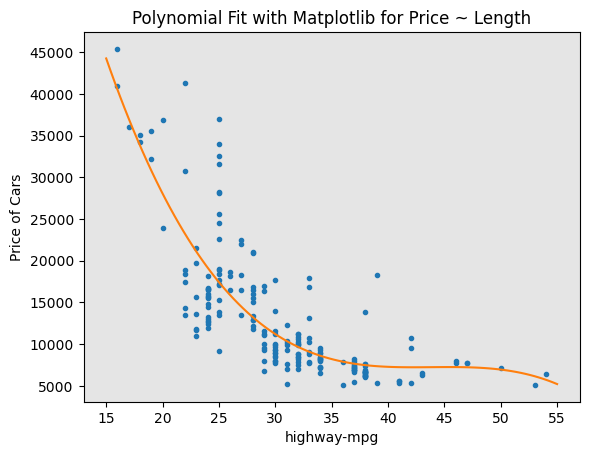

In [46]:
PlotPolly(p, x, y, 'highway-mpg')

In [47]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

<p>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.</p>


Nous pouvons déjà voir en traçant que ce modèle polynomial est plus performant que le modèle linéaire. En effet, la fonction polynomiale générée « frappe » plus de points de données.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #4:</h1>
<b>Create 11 order polynomial model with the variables x and y from above.</b>
</div>


In [ ]:
Créez un modèle polynomial d’ordre 11 avec les variables x et y ci-dessus.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


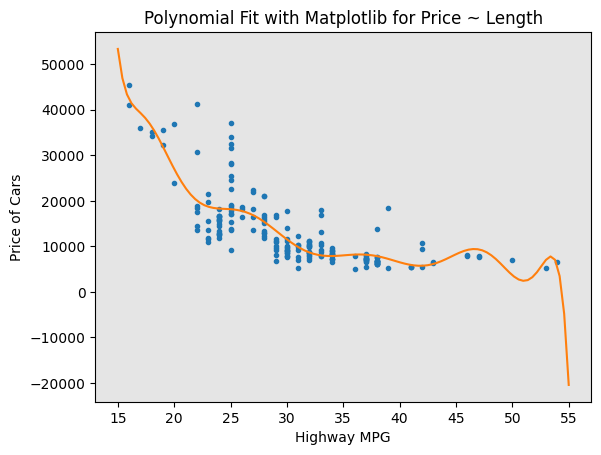

In [51]:
# Write your code below and press Shift+Enter to execute 

# Ici, nous utilisons un polynôme d’ordre 3 (cubique)
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')


<details><summary>Click here for the solution</summary>

```python
# Here we use a polynomial of the 11rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

```

</details>



<p>The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2) polynomial with two variables is given by:</p>


L’expression analytique de la fonction polynomiale multivariée devient compliquée. Par exemple, l’expression d’un polynôme du second ordre (degré = 2) à deux variables est donnée par :

$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$


We can perform a polynomial transform on multiple features. First, we import the module:


Nous pouvons effectuer une transformation polynomiale sur plusieurs entités. Tout d’abord, nous importons le module :

In [52]:
from sklearn.preprocessing import PolynomialFeatures

We create a <b>PolynomialFeatures</b> object of degree 2: 


In [53]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [54]:
Z_pr=pr.fit_transform(Z)

In the original data, there are 201 samples and 4 features.


In [55]:
Z.shape

(201, 4)

After the transformation, there are 201 samples and 15 features.


In [56]:
Z_pr.shape

(201, 15)

<h2>Pipeline</h2>


<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>


Les pipelines de données simplifient les étapes de traitement des données. Nous utilisons le module Pipeline pour créer un pipeline. Nous utilisons également StandardScaler comme étape dans notre pipeline.

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.


In [ ]:
Nous créons le pipeline en créant une liste de tuples comprenant le nom du modèle ou de l’estimateur et son constructeur correspondant.

In [59]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

We input the list as an argument to the pipeline constructor:


In [60]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data,  perform a transform and fit the model simultaneously. 


Tout d’abord, nous convertissons le type de données Z en type float pour éviter les avertissements de conversion qui peuvent apparaître à la suite de la prise d’entrées à virgule flottante par StandardScaler.

Ensuite, nous pouvons normaliser les données, effectuer une transformation et ajuster le modèle simultanément.

In [61]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

 Similarly,  we can normalize the data, perform a transform and produce a prediction  simultaneously.


De même, nous pouvons normaliser les données, effectuer une transformation et produire une prédiction simultanément.

In [62]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #5:</h1>
<b>Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.</b>
</div>


Créez un pipeline qui standardise les données, puis produisez une prédiction à l’aide d’un modèle de régression linéaire à l’aide des fonctionnalités Z et de la cible y.

In [63]:
# Write your code below and press Shift+Enter to execute 
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]


array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

<details><summary>Click here for the solution</summary>

```python
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

```

</details>



<h2>4. Measures for In-Sample Evaluation</h2>


4. Mesures pour l’évaluation dans l’échantillon¶

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>



<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>


<p>Lors de l’évaluation de nos modèles, nous voulons non seulement visualiser les résultats, mais aussi une mesure quantitative pour déterminer la précision du modèle.</p>

<p>Deux mesures très importantes qui sont souvent utilisées en statistique pour déterminer la précision d’un modèle sont :</p>
<ul>
    <li><b>R^2 / R au carré</b></li>
    <li><b>Erreur quadratique moyenne (MSE)</b></li>
</ul>
    
<b>R au carré</b>

<p>R au carré, également connu sous le nom de coefficient de détermination, est une mesure permettant d’indiquer la proximité des données avec la droite de régression ajustée.</p>
    
<p>La valeur du R au carré est le pourcentage de variation de la variable de réponse (y) qui est expliqué par un modèle linéaire.</p>

<b>Erreur quadratique moyenne (MSE)</b>

<p>L’erreur quadratique moyenne mesure la moyenne des carrés d’erreurs. C’est-à-dire la différence entre la valeur réelle (y) et la valeur estimée (ŷ).</p>


<h3>Model 1: Simple Linear Regression</h3>


Let's calculate the R^2:


In [64]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


We can say that ~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".


On peut dire que ~49,659% de la variation du prix s’explique par ce modèle linéaire simple « horsepower_fit ».

Let's calculate the MSE:


We can predict the output i.e., "yhat" using the predict method, where X is the input variable:


Nous pouvons prédire la sortie, c’est-à-dire « yhat » en utilisant la méthode predict, où X est la variable d’entrée :

In [65]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


Let's import the function <b>mean_squared_error</b> from the module <b>metrics</b>:


Importons la fonction mean_squared_error à partir des métriques du module :

In [66]:
from sklearn.metrics import mean_squared_error

We can compare the predicted results with the actual results:


In [67]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


<h3>Model 2: Multiple Linear Regression</h3>


Let's calculate the R^2:


In [68]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".


On peut dire que ~80,896 % de la variation de prix s’explique par cette régression linéaire multiple « multi_fit ».

Let's calculate the MSE.


We produce a prediction:


In [69]:
Y_predict_multifit = lm.predict(Z)

We compare the predicted results with the actual results:


In [70]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


<h3>Model 3: Polynomial Fit</h3>


Let's calculate the R^2.


Let’s import the function <b>r2_score</b> from the module <b>metrics</b> as we are using a different function.


Importons la fonction r2_score à partir des métriques du module car nous utilisons une fonction différente.

In [71]:
from sklearn.metrics import r2_score

We apply the function to get the value of R^2:


Nous appliquons la fonction pour obtenir la valeur de R^2 :

In [72]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.702376909243598


We can say that ~67.419 % of the variation of price is explained by this polynomial fit.


On peut dire que ~67,419 % de la variation de prix s’explique par cet ajustement polynomial.

<h3>MSE</h3>


We can also calculate the MSE:  


In [73]:
mean_squared_error(df['price'], p(x))

18703127.63915394

<h2>5. Prediction and Decision Making</h2>
<h3>Prediction</h3>

<p>In the previous section, we trained the model using the method <b>fit</b>. Now we will use the method <b>predict</b> to produce a prediction. Lets import <b>pyplot</b> for plotting; we will also be using some functions from numpy.</p>


# 5. Prédiction et prise de décision
Prédiction
Dans la section précédente, nous avons entraîné le modèle à l’aide de la méthode d’ajustement. Nous allons maintenant utiliser la méthode predict pour produire une prédiction. Importons pyplot pour le traçage ; Nous utiliserons également certaines fonctions de Numpy.

In [74]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Create a new input:


Créez une nouvelle entrée :

In [75]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

Bonjour @ MAHI NDOUNG rodrigue,

Merci pour votre message. Nous sommes heureux de vous aider.

L'expression new_input = np.arange (1, 100, 1) .reshape (-1, 1) implique deux fonctions NumPy principales : arange () et reshape ().

np.arange (1, 100, 1) :

np.arange () est une fonction NumPy qui génère un tableau de valeurs dans une

 plage spécifiée. 
Paramètres :

Cela génère un tableau d'entiers allant de 1 à 100 (mais non compris), avec une taille de pas de 1. Ainsi, new_input sera un tableau comme [1, 2, 3,..., 99

.reshape (-1, 1) :

reshape () est une méthode de NumPy utilisée pour modifier la forme (dimensions) d'un

 tableau sans modifier ses données. 
Paramètres :

La combinaison de -1 et 1 remodèle le tableau new_input en un vecteur colonne où chaque élément se trouve dans sa propre ligne. Ainsi, après le remodelage, new_input sera un tableau de forme (99, 1), c'est-à-dire 99 lignes et 1

Bon apprentissage !

Cordialement

 Fit the model:


In [76]:
lm.fit(X, Y)
lm

LinearRegression()

Produce a prediction:


In [77]:
yhat=lm.predict(new_input)
yhat[0:5]

/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

We can plot the data:


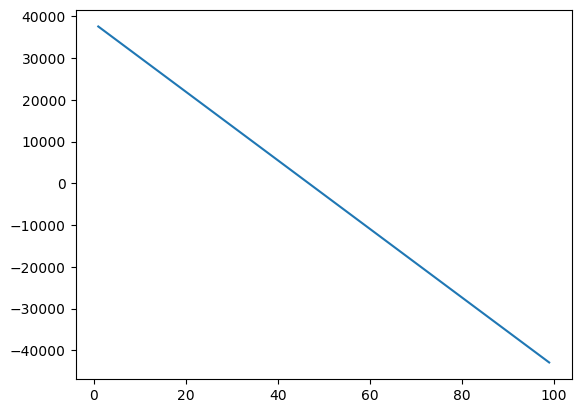

In [78]:
plt.plot(new_input, yhat)
plt.show()

<h3>Decision Making: Determining a Good Model Fit</h3>


<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>


<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


<p>Maintenant que nous avons visualisé les différents modèles et généré les valeurs R au carré et MSE pour les ajustements, comment déterminer un bon ajustement du modèle ?
<ul>
    <li><i>Qu’est-ce qu’une bonne valeur R au carré ?</i></li>
</ul>
</p>

<p>Lors de la comparaison des modèles, <b>le modèle avec la valeur R au carré la plus élevée est mieux adapté aux</b> données.
<ul>
    <li><i>Qu’est-ce qu’un bon MSE ?</i></li>
</ul>
</p>

<p>Lors de la comparaison des modèles, <b>le modèle avec la plus petite valeur MSE est mieux adapté aux</b> données.</p>

<h4>Jetons un coup d’œil aux valeurs des différents modèles.</h4>
<p>Régression linéaire simple : utilisation de l’autoroute comme variable prédictive du prix.
<ul>
    <li>R au carré : 0,49659118843391759</li>
    <li>MSE : 3,16 x10^7</li>
</ul>
</p>
    
<p>Régression linéaire multiple : utilisation de la puissance, du poids à vide, de la taille du moteur et de la consommation d’énergie sur l’autoroute comme variables prédictives du prix.
<ul>
<li>R au carré : 0,80896354913783497</li>
    <li>MSE : 1,2 x10^7</li>
</ul>
</p>
    
<p>Ajustement polynomial : utilisation de l’autoroute comme variable prédictive du prix.
<ul>
    <li>R au carré : 0,6741946663906514</li>
    <li>MSE : 2,05 x 10^7</li>
</ul>
</p>


<h3>Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)</h3>


<p>Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.</p>

<p>In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>MSE</b>: The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.


Habituellement, plus vous avez de variables, plus votre modèle est capable de prédire, mais ce n’est pas toujours vrai. Parfois, vous n’avez pas assez de données, vous pouvez rencontrer des problèmes numériques ou de nombreuses variables peuvent ne pas être utiles et même agir comme du bruit. Par conséquent, vous devez toujours vérifier le MSE et le R^2.

Afin de comparer les résultats des modèles MLR et SLR, nous examinons une combinaison du R au carré et de la MSE pour tirer la meilleure conclusion sur l’ajustement du modèle.

   - MSE : Le MSE du reflex est de 3,16x10^7 tandis que le MLR a un MSE de 1,2 x10^7. L’EMS de MLR est beaucoup plus petite.
   - R au carré : Dans ce cas, nous pouvons également voir qu’il y a une grande différence entre le R au carré du SLR et le R au carré du MLR. Le R au carré pour le SLR (~0,497) est très petit par rapport au R au carré pour le MLR (~0,809).
     
Ce R au carré en combinaison avec le MSE montre que le MLR semble être le meilleur modèle dans ce cas par rapport au SLR.

<h3>Simple Linear Model (SLR) vs. Polynomial Fit</h3>


<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.</p>


MSE : Nous pouvons voir que l’ajustement polynomial a fait tomber le MSE, car ce MSE est plus petit que celui du SLR.
R au carré : Le R au carré pour l’ajustement polynomial est plus grand que le R au carré pour le reflex, donc l’ajustement polynomial a également fait monter un peu le R au carré.
Étant donné que l’ajustement polynomial a entraîné une MSE plus faible et un R carré plus élevé, nous pouvons conclure qu’il s’agissait d’un meilleur modèle d’ajustement que la simple régression linéaire pour prédire le « prix » avec « highway-mpg » comme variable prédictive.

<h3>Multiple Linear Regression (MLR) vs. Polynomial Fit</h3>


<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>


- MSE : Le MSE pour le MLR est plus petit que le MSE pour l’ajustement polynomial.
- R au carré : Le R au carré pour le MLR est également beaucoup plus grand que pour l’ajustement polynomial.

<h2>Conclusion</h2>


<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.</p>


En comparant ces trois modèles, nous concluons que le modèle MLR est le meilleur modèle pour pouvoir prédire le prix à partir de notre ensemble de données. Ce résultat est logique puisque nous avons 27 variables au total et que nous savons que plus d’une de ces variables sont des prédicteurs potentiels du prix final de la voiture.

### Thank you for completing this lab!


## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>


### Other Contributors

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/" target="_blank">Mahdi Noorian PhD</a>

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/" target="_blank">Fiorella Wenver</a>

<a href=" https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

<a href="https://www.coursera.org/instructor/~129186572" target = "_blank" > Abhishek Gagneja</a>

## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2023-09-28 | 2.3 | Abhishek Gagneja | Updated instructions |
| 2020-10-30  | 2.2  | Lakshmi  |Changed url of csv  |
| 2020-09-09  | 2.1  | Lakshmi  | Fixes made in Polynomial Regression Equations  |
| 2020-08-27  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab  |




<hr>

## <h3 align="center"> © IBM Corporation 2023. All rights reserved. <h3/>
